# Conceptual Saliency

Welcome to the **Conceptual Saliency** notebook! This project aims to apply Formal Concept Analysis (FCA) algorithms to a dataset and analyse the resulting visualizations using saliency mapping techniques.

## Overview

Formal Concept Analysis (FCA) is a mathematical technique used for data analysis, knowledge representation, and information retrieval. By using FCA, we can extract meaningful patterns and relationships from complex datasets. Saliency mapping, on the other hand, helps in identifying the most significant parts of a visualisation, aiding in better interpretation and insights.

## Project Goals

- Implement and test various FCA algorithms on different datasets.
- Generate visualizations of the concept lattices and other FCA structures.
- Apply saliency mapping techniques to these visualizations to highlight key insights.
- Analyse and document the outcomes to refine the workflow and improve results.

## Reference Libraries

Python libraries that I will try:
- For Formal Concept Analysis: [https://github.com/EgorDudyrev/FCApy](https://github.com/EgorDudyrev/FCApy) a python package to work with Formal Concept Analysis.
- For Saliency mapping:
  - [https://github.com/pair-code/saliency](https://github.com/pair-code/saliency)
  - [https://github.com/matthias-k/pysaliency](https://github.com/matthias-k/pysaliency) analyzing and modeling of eye movement

## Reference Datasets

Datasets I will use for testing:
- The Tate Collection: [https://github.com/tategallery/collection](https://github.com/tategallery/collection) starting from some pre-processed data already available here [https://github.com/SPARQL-Anything/showcase-tate](https://github.com/SPARQL-Anything/showcase-tate) 

## Data Preparation

In order to apply FCA methods, the library needs a matrix as input, such as this one

In [ ]:
'''
,fly,hunt,run,swim
dove,True,False,False,False
hen,False,False,False,False
duck,True,False,False,True
goose,True,False,False,True
owl,True,True,False,False
hawk,True,True,False,False
eagle,True,True,False,False
fox,False,True,True,False
dog,False,False,True,False
wolf,False,True,True,False
cat,False,True,True,False
tiger,False,True,True,False
lion,False,True,True,False
horse,False,False,True,False
zebra,False,False,True,False
cow,False,False,False,False
'''

Understanding how to generalise this passage will be subject of further discussion. However, for the time being, I will create a binary matrix `artworkId x subjectName` starting from subjects.csv and subjects-artworks-id.csv files available [here](https://github.com/SPARQL-Anything/showcase-tate).
Namely,

In [ ]:
# subjects.csv
'''
subjectId,subjectName
,
1,subject
4,group/movement
13,architecture
14,agricultural
15,bridges and viaducts
17,features
18,garden structures
19,industrial
20,military
21,monuments
22,periods and styles
23,places of entertainment
24,public and municipal
25,religious
26,residential
...
'''

# subjects-artworks-id.csv
'''
subjectId,artworkId
25,5700
13,5748
4537,8416
92,15718
1519,23478
29,15699
166,105988
92,10108
78,7214
91,23699
14439,20199
...
'''

I will:
1. **Load the CSV files** into data frames.
2. **Filter** the `subjects-artworks-id.csv` dataframe to include only rows where the `subjectId` is between 1 and 100.
3. **Merge** the filtered dataframe with the `subjects.csv` dataframe on the `subjectId` to get the corresponding `subjectName`.
4. **Create the binary matrix** with `artworkId` as rows and `subjectName` as columns, with True or False values.

In [1]:
from fcapy.context import FormalContext
import os
import pandas as pd

In [2]:
# load subjects
subjects_df = pd.read_csv('https://raw.githubusercontent.com/SPARQL-Anything/showcase-tate/main/subjects.csv')

# load subjects-artworks relationships
subjects_artworks_df = pd.read_csv('https://raw.githubusercontent.com/SPARQL-Anything/showcase-tate/main/subjects-artworks-id.csv')

# Filter the subjects_artworks_df to include only subjectId between 1 and 100
filtered_subjects_artworks_df = subjects_artworks_df[(subjects_artworks_df['subjectId'] >= 1) & (subjects_artworks_df['subjectId'] <= 100)]
# Merge the filtered dataframe with the subjects dataframe on subjectId
merged_df = pd.merge(filtered_subjects_artworks_df, subjects_df, on='subjectId')

# Display the final dataframe
print(len(merged_df))
print(merged_df)

290753
        subjectId  artworkId                    subjectName
0              25       5700                      religious
1              13       5748                   architecture
2              92      15718  actions: postures and motions
3              29      15699   emotions, concepts and ideas
4              92      10108  actions: postures and motions
...           ...        ...                            ...
290748         31      10804   emotions and human qualities
290749         15      42395           bridges and viaducts
290750         58       8119   literature (not Shakespeare)
290751         78       2802                        objects
290752         22       6267             periods and styles

[290753 rows x 3 columns]


In [3]:
# create the binary matrix with True/False values

# ensure the results directory exists
results_dir = '../results'
output_file_path = os.path.join(results_dir, 'artwork_subject_binary_matrix.csv')

# Set artworkId as the index for merged_df
merged_df.set_index('artworkId', inplace=True)
# Create a pivot table with artworkId as rows and subjectName as columns
pivot_df = merged_df.pivot_table(index='artworkId', columns='subjectName', aggfunc=lambda x: True, fill_value=False)

# Drop the 'subjectId' level from the columns
pivot_df.columns = pivot_df.columns.droplevel()
pivot_df.index.name = None  # Remove index name for similarity to the provided example
# # Convert the values to boolean (True for presence, False for absence)
# pivot_df = pivot_df.applymap(lambda x: True if x > 0 else False)

# Display the final pivot table
print(pivot_df)

# Save the pivot_df as a CSV file
pivot_df.to_csv(output_file_path)

subjectName  Shakespeare  actions: postures and motions  adults  agricultural  \
3                  False                          False   False         False   
4                  False                          False   False         False   
5                  False                           True    True         False   
7                  False                          False   False         False   
8                  False                          False   False         False   
...                  ...                            ...     ...           ...   
127129             False                          False   False         False   
127130             False                          False   False         False   
127131             False                          False   False         False   
127717             False                          False    True         False   
129068             False                          False   False         False   

subjectName  agriculture, g

## Formal Context

In [4]:
results_dir = '../results'
output_file_path = os.path.join(results_dir, 'artwork_subject_binary_matrix.csv')
# load the CSV file and ensure the index (artworkId) is of type str
df = pd.read_csv(output_file_path, index_col=0)
df.index = df.index.map(str)

# Create the FormalContext
K = FormalContext.from_pandas(df)
K.write_csv('../results/artwork_subject_context.csv', sep=',')


# Print the first five objects data
print(len(K))
print('# objects', K.n_objects, '; # attributes', K.n_attributes)
print(K[:5])

55357
# objects 55357 ; # attributes 73
FormalContext (5 objects, 73 attributes, 23 connections)
 |Shakespeare|actions: postures and motions|adults|agricultural|agriculture, gardening & fishing|...|universal concepts|water: inland|weapons|weather|workspaces|
3|           |                             |      |            |                                |...|                  |             |       |       |          |
4|           |                             |      |            |                                |...|                  |             |       |      X|          |
5|           |                            X|     X|            |                                |...|                  |             |       |       |          |
7|           |                             |      |            |                                |...|                  |             |       |       |          |
8|           |                             |      |            |                             

In [83]:
print(len(K.extension( ['landscape', 'water: inland'] )))

8028


In [76]:
print(K.intention( ['767'] ))

['architecture', 'cities, towns, villages (non-UK)', 'countries and continents', 'periods and styles', 'places', 'religious', 'townscapes, man-made features']


## Concept Lattice

In [5]:
# create the concept lattice
from fcapy.lattice import ConceptLattice
L = ConceptLattice.from_context(K, algo='Sofia', L_max = 1000, min_supp = 0.1, use_tqdm=True)
print("# concepts:", len(L))

c:\Users\giuli\Desktop\conceptual-saliency\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Iter. Sofia projections: 100%|██████████| 73/73 [00:00<00:00, 417.01it/s]


# concepts: 33


In [17]:
print(L.top, L.bottom)

0 32


In [7]:
for i, c in enumerate(L):
    print(f"Concept {i}:\nextent {len(c.extent)}\nintent {len(c.intent)}\n")

Concept 0:
extent 55357
intent 0

Concept 1:
extent 36477
intent 1

Concept 2:
extent 29787
intent 1

Concept 3:
extent 23323
intent 2

Concept 4:
extent 22713
intent 2

Concept 5:
extent 20798
intent 1

Concept 6:
extent 19158
intent 2

Concept 7:
extent 18499
intent 2

Concept 8:
extent 15963
intent 3

Concept 9:
extent 14470
intent 3

Concept 10:
extent 12381
intent 1

Concept 11:
extent 11075
intent 2

Concept 12:
extent 10161
intent 2

Concept 13:
extent 9812
intent 4

Concept 14:
extent 9576
intent 3

Concept 15:
extent 8950
intent 2

Concept 16:
extent 8281
intent 3

Concept 17:
extent 8248
intent 1

Concept 18:
extent 8207
intent 3

Concept 19:
extent 8028
intent 3

Concept 20:
extent 7797
intent 2

Concept 21:
extent 7499
intent 3

Concept 22:
extent 7248
intent 2

Concept 23:
extent 6826
intent 2

Concept 24:
extent 6647
intent 2

Concept 25:
extent 6400
intent 3

Concept 26:
extent 6274
intent 1

Concept 27:
extent 6154
intent 2

Concept 28:
extent 5826
intent 3

Concept 29:

### Visualisation

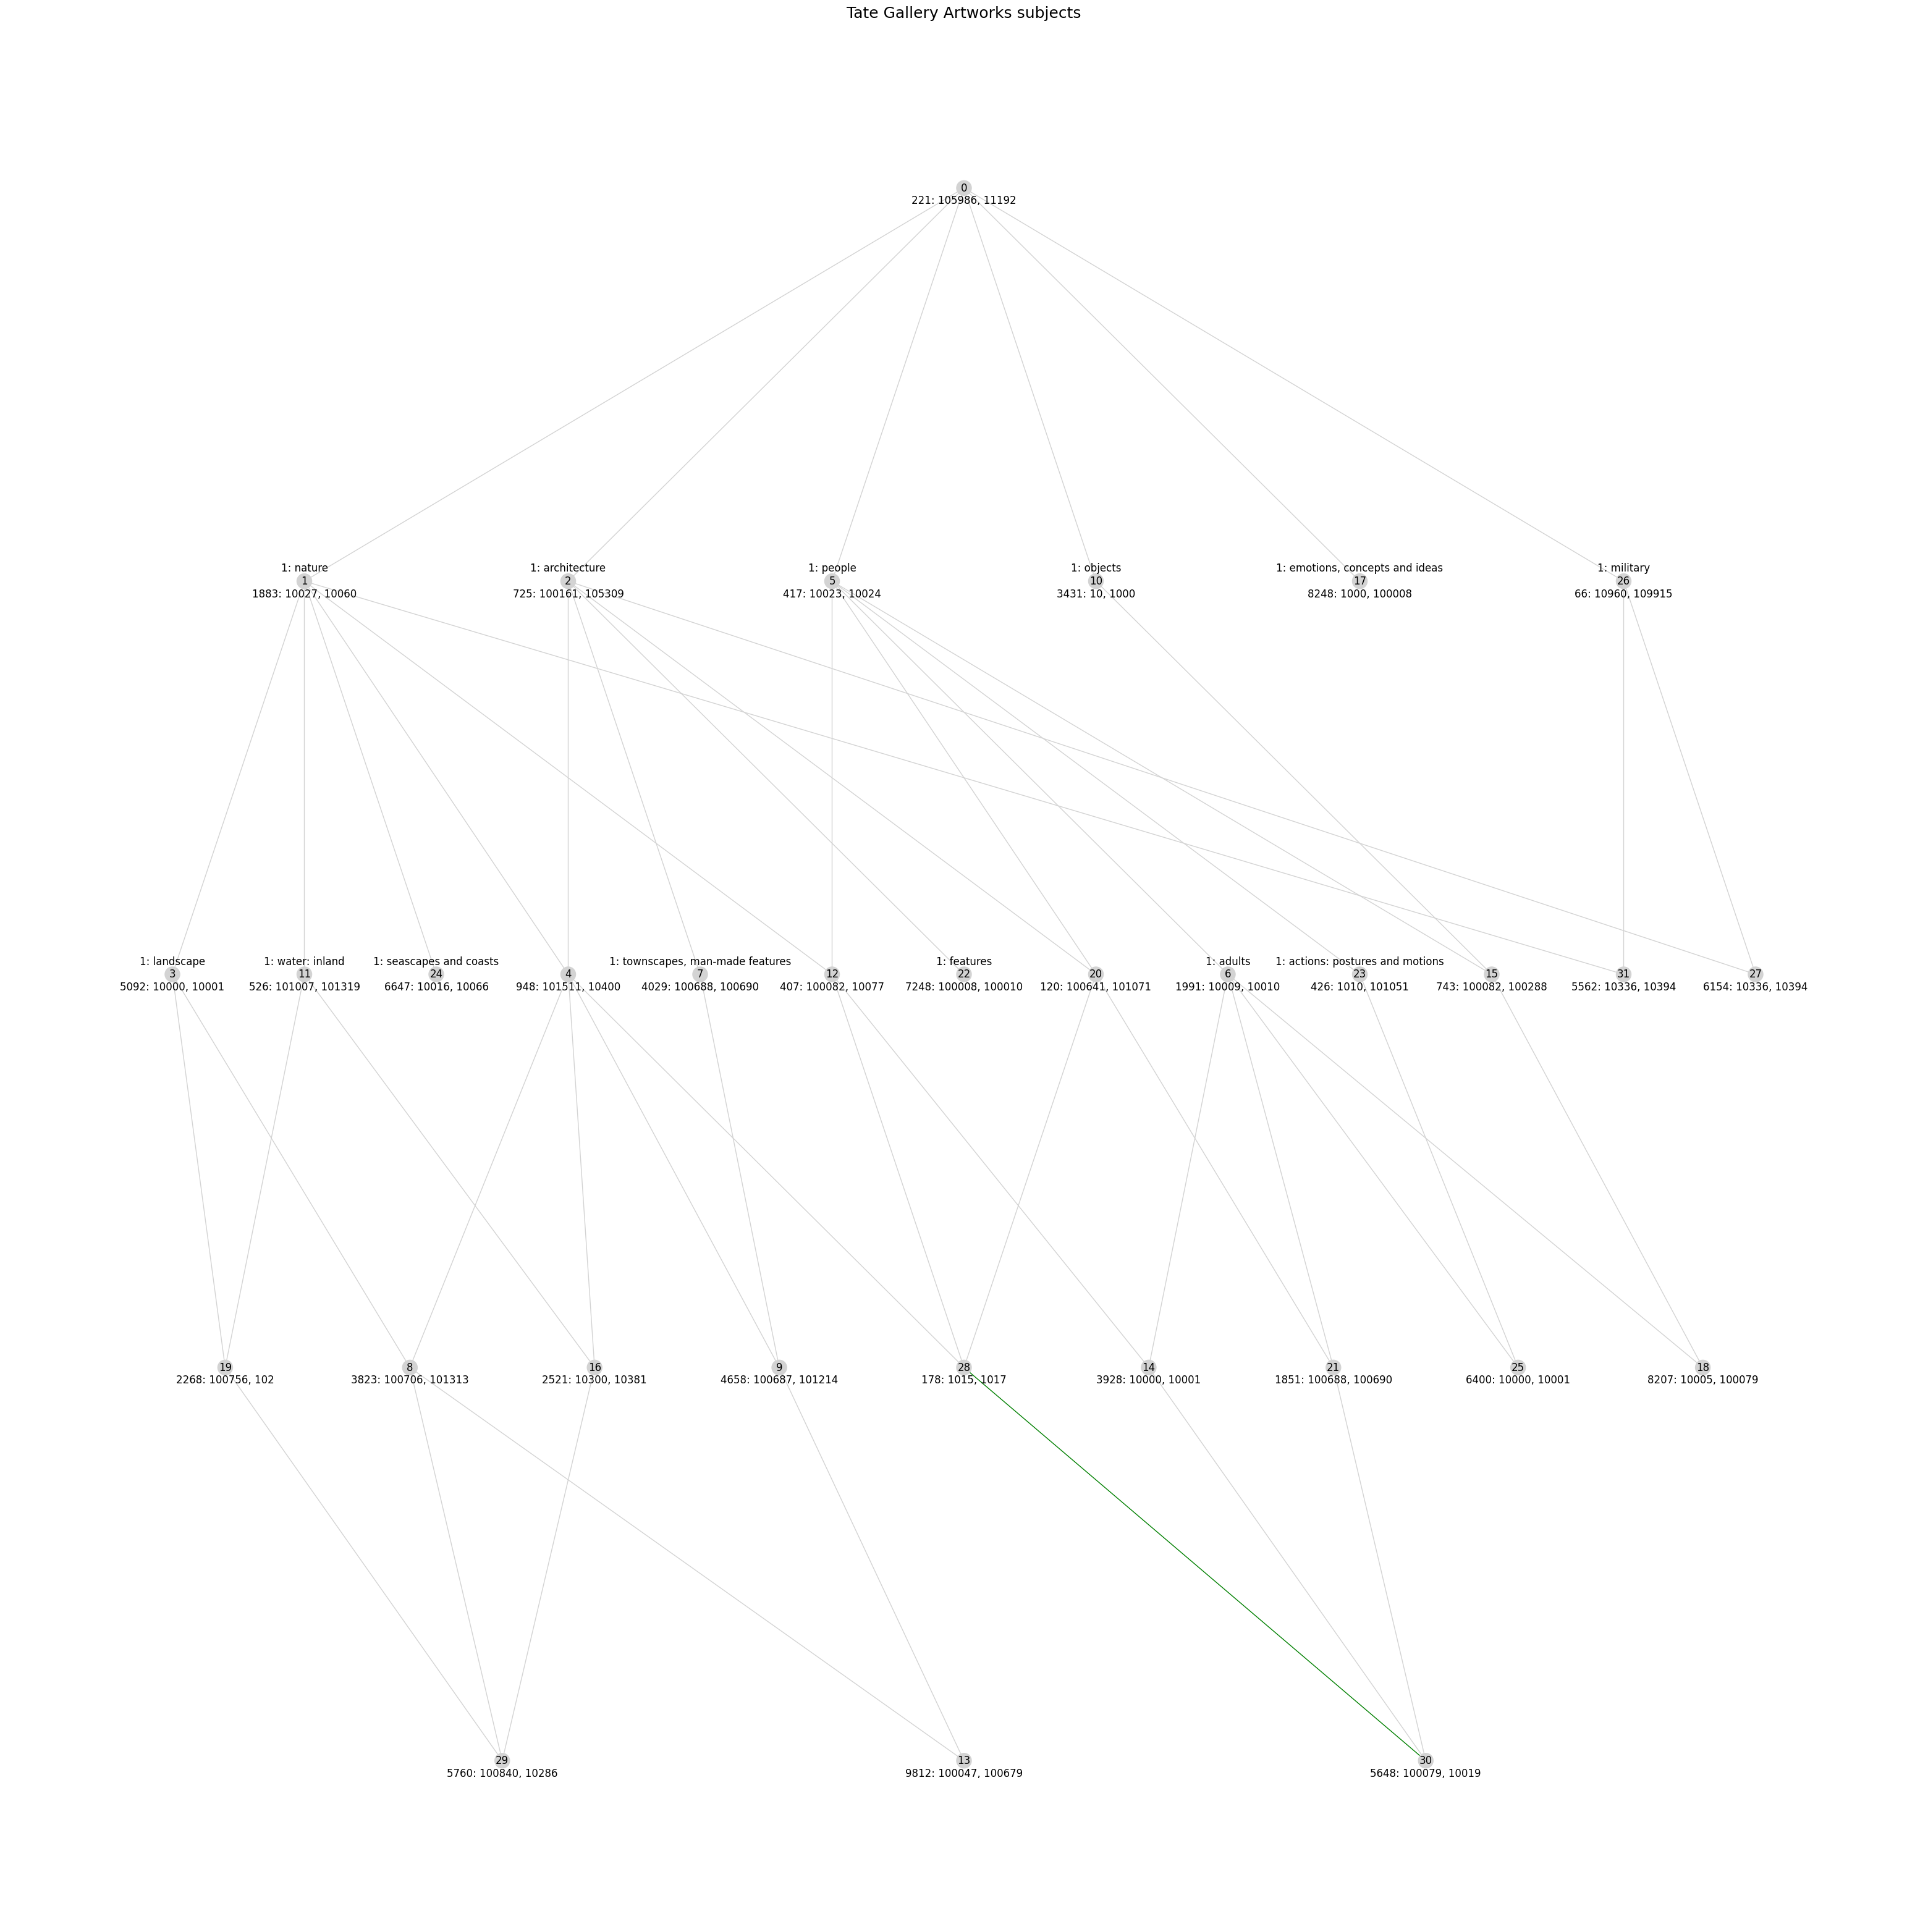

In [6]:
import matplotlib.pyplot as plt
from fcapy.visualizer import LineVizNx
fig, ax = plt.subplots(figsize=(40, 40))
vsl = LineVizNx()
vsl.draw_concept_lattice(L, ax=ax, flg_drop_bottom_concept=True, flg_node_indices=True, edge_color=['green' if e==(22, 32) else vsl.edge_color for e in  L.to_networkx().edges()],node_color=['pink' if v == (28, 13) else vsl.node_color for v in L.to_networkx().nodes()])
ax.set_title('Tate Gallery Artworks subjects', fontsize=18)
plt.show()

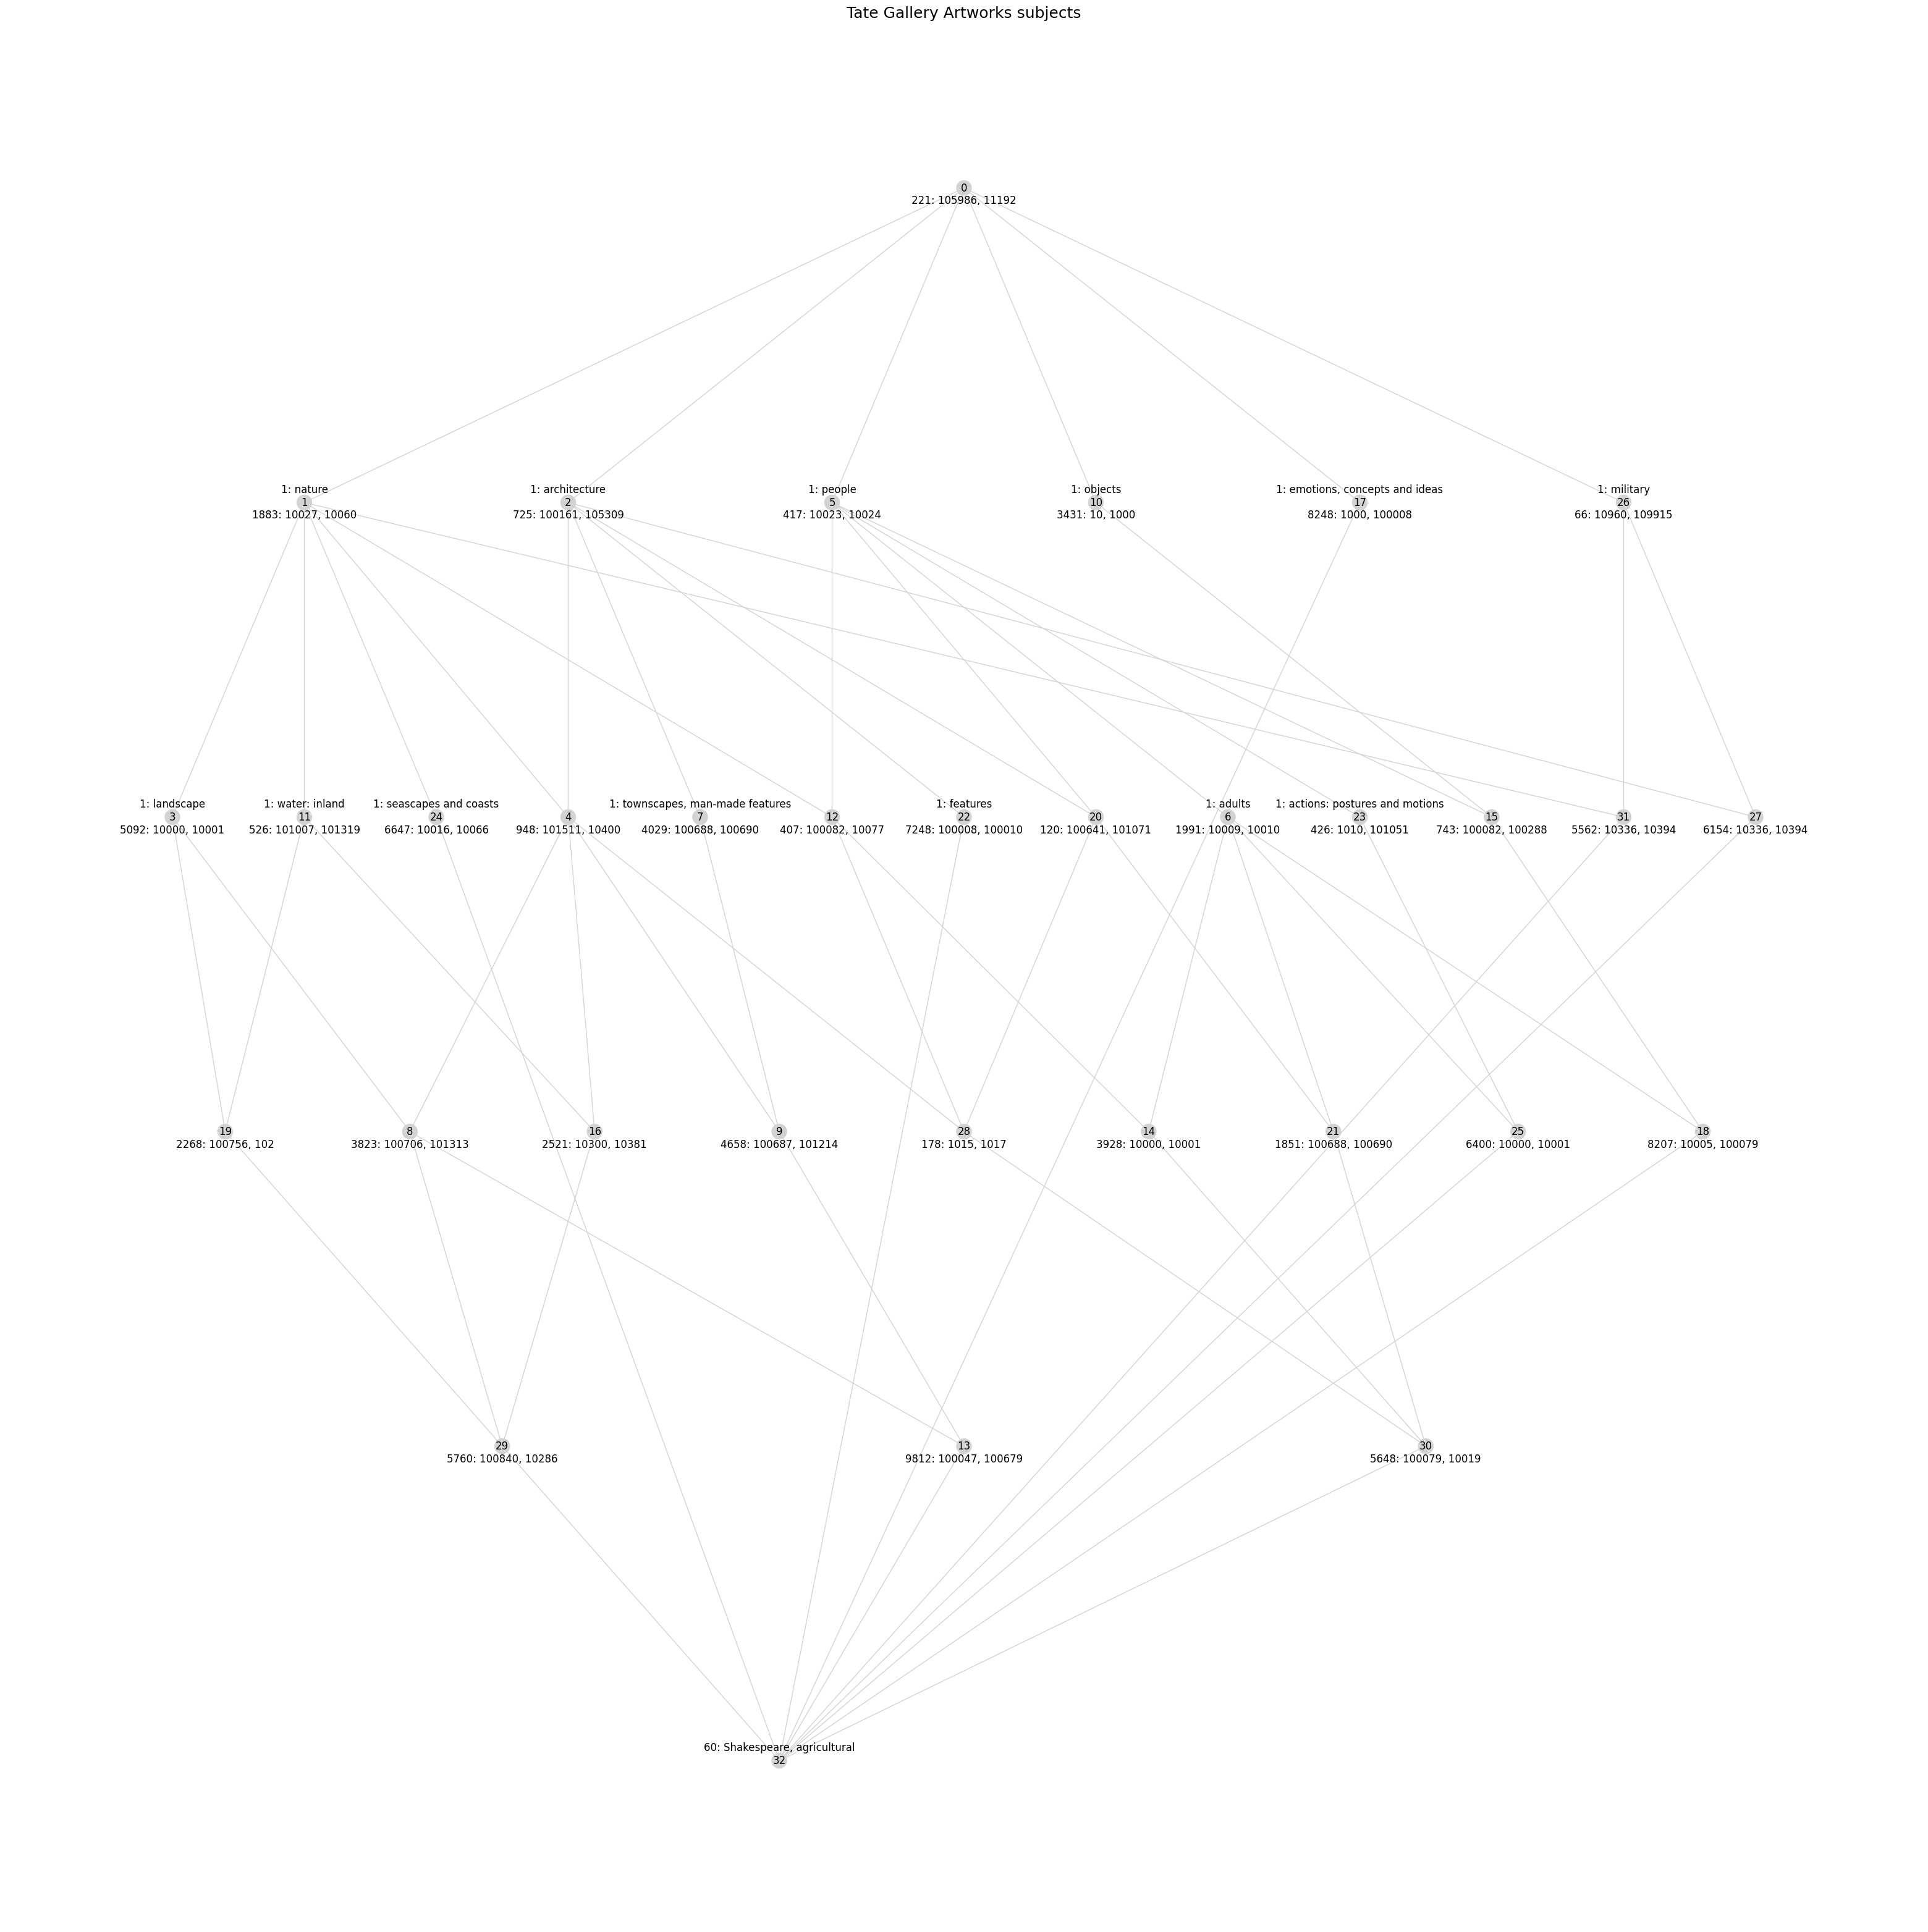

In [95]:
vsl.mover.place_node(32, vsl.mover.posx[9])
fig, ax = plt.subplots(figsize=(40, 40))
vsl.draw_concept_lattice(L, ax=ax, flg_node_indices=True,
    flg_new_intent_count_prefix=True, flg_new_extent_count_prefix=True)
ax.set_title('Tate Gallery Artworks subjects', fontsize=18)
plt.show()

In [89]:
import numpy as np

n_best = len(L)

L.calc_concepts_measures('log_stability_lbound', K)  # estimate the stability
stabs = np.array(L.measures['log_stability_lbound'])  # put it into numpy array
stabs[[L.top, L.bottom]] = np.inf  # set the stability of the top and the bottom of the lattice to inf. As we definitely want them to be among the best concepts
best_idxs = sorted(np.argsort(stabs)[-n_best:])  # find the indices of the best concepts
L_best = ConceptLattice(L[best_idxs])  # construct the lattice of the best concepts
node_size = np.sqrt([c.support / len(K) for c in L_best])*10000

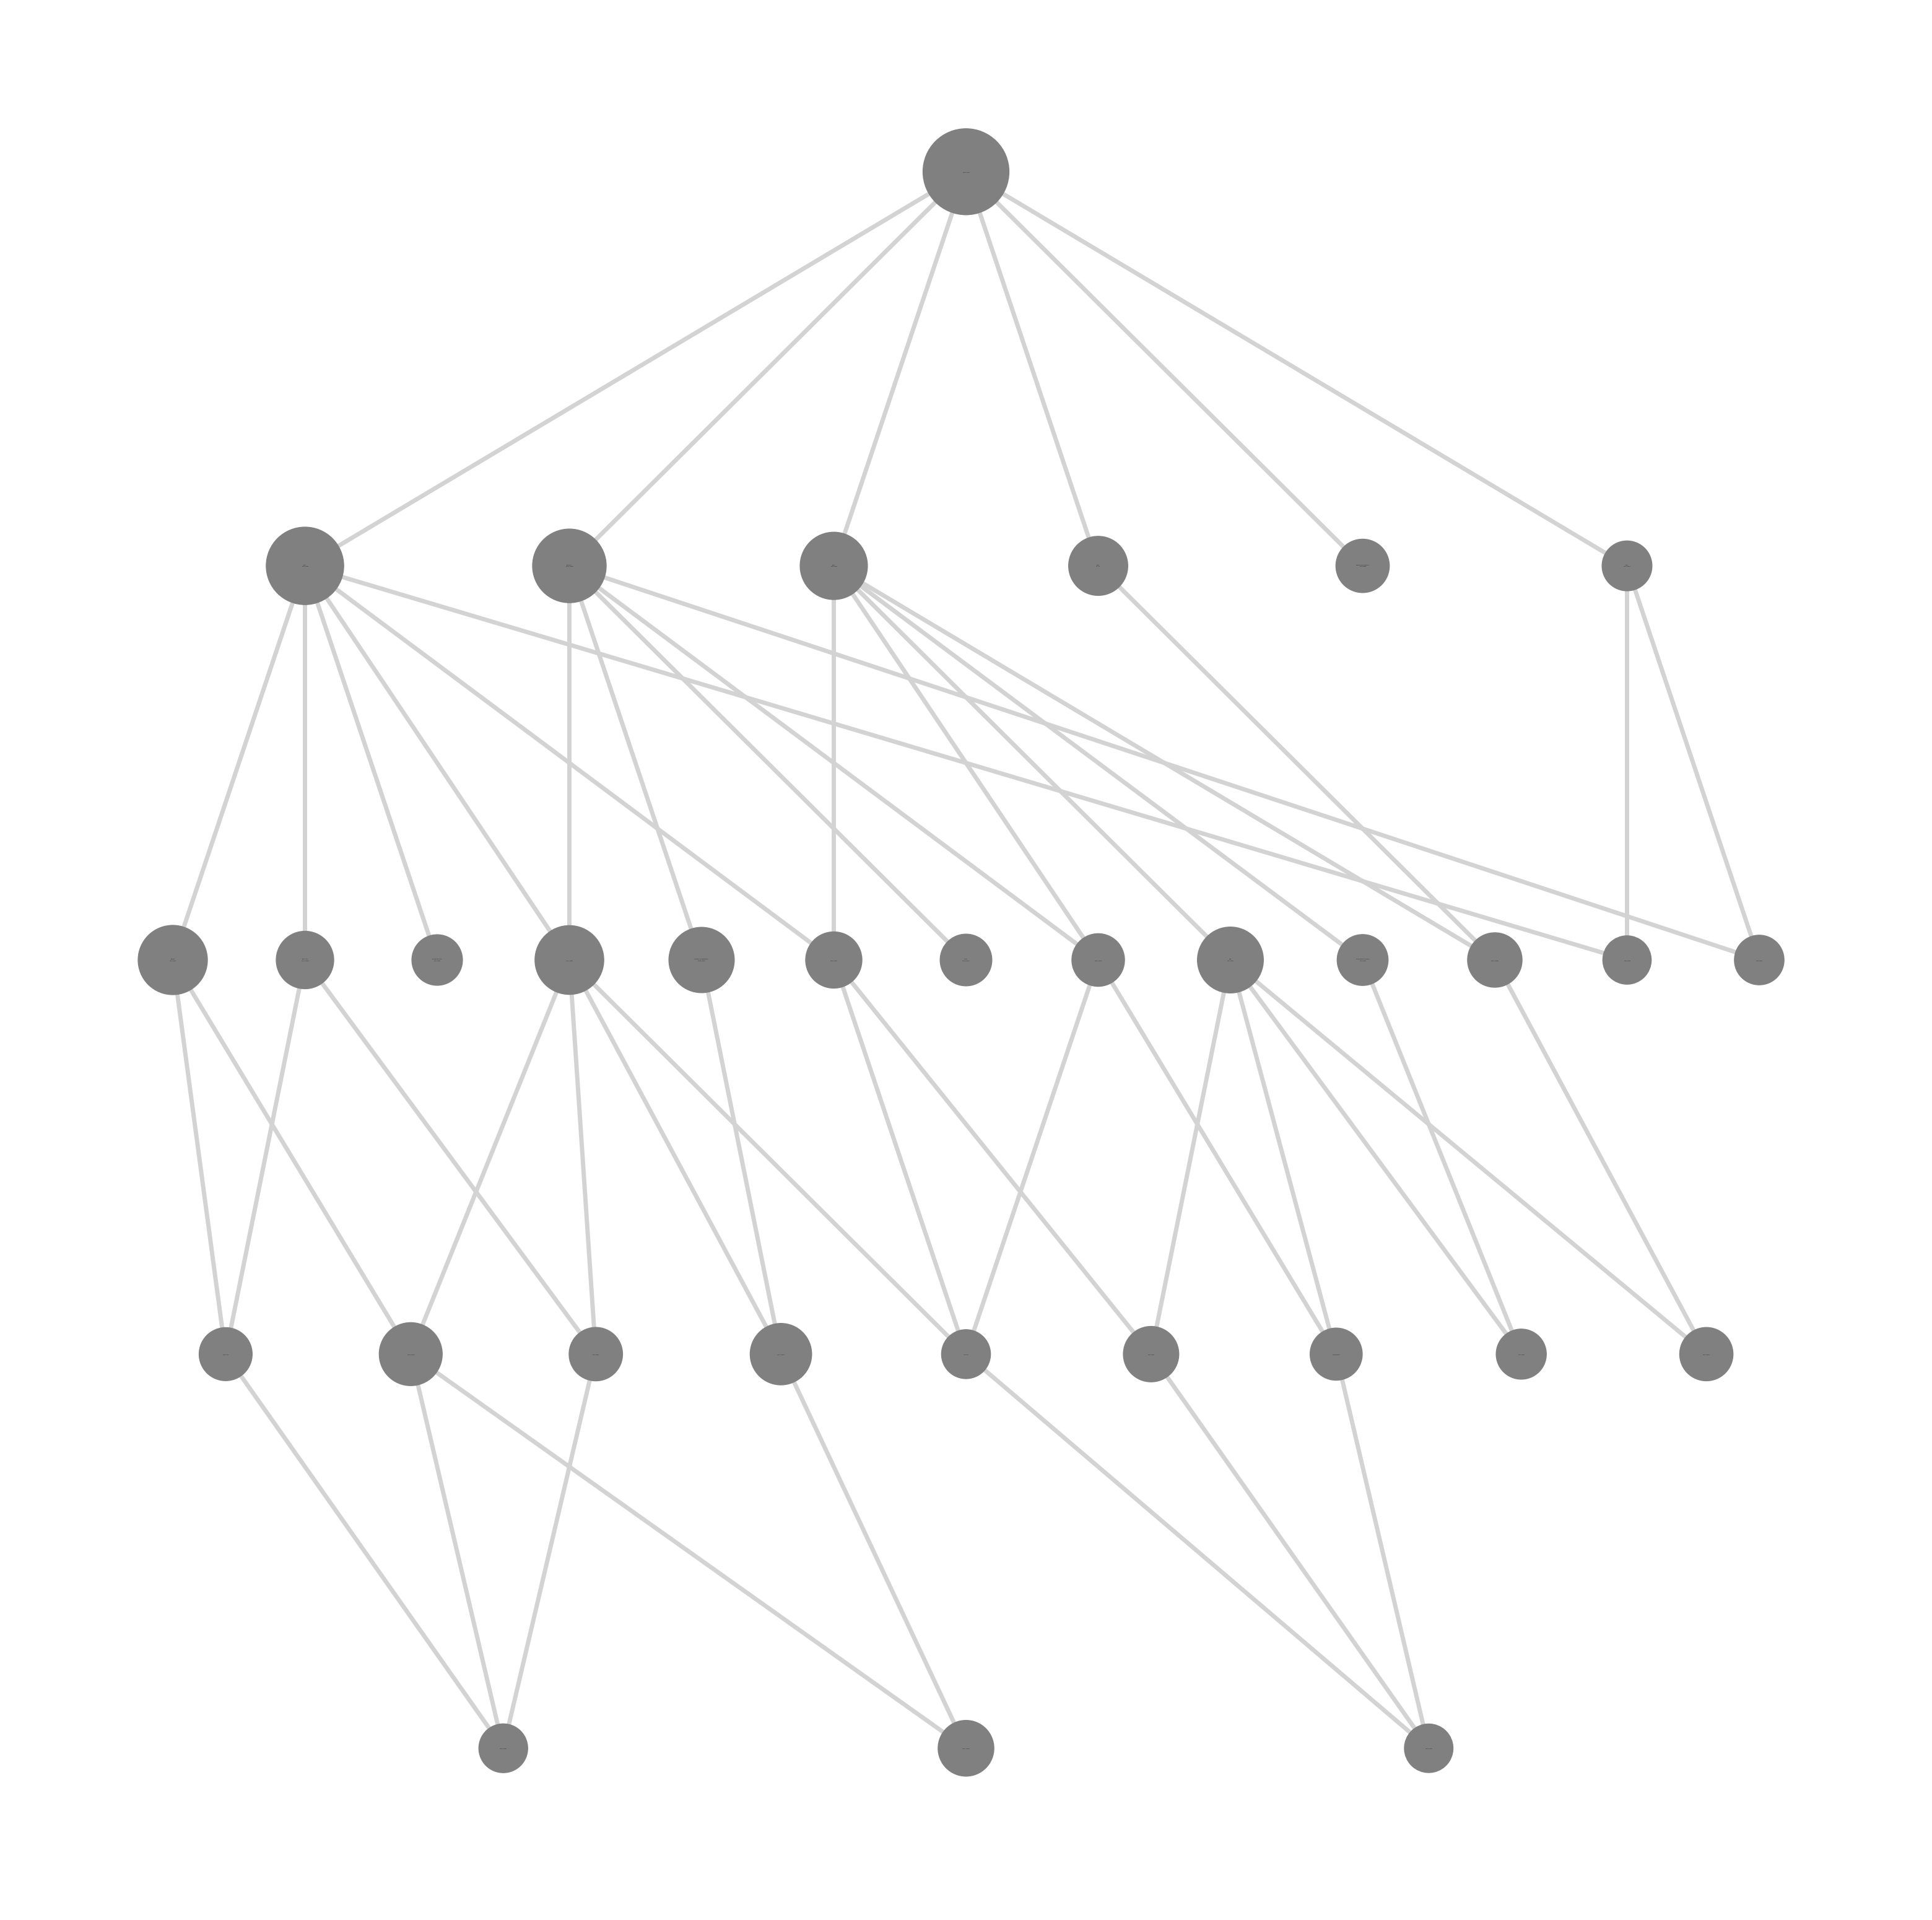

In [115]:
fig, ax = plt.subplots(figsize=(40, 40))
vsl = LineVizNx()
vsl.draw_concept_lattice(L, node_color='gray', edge_width=5, ax=ax, flg_drop_bottom_concept=True, flg_node_indices=False, flg_new_intent_count_prefix=False, flg_new_extent_count_prefix=False, node_size=node_size, node_label_font_size=0)
ax.set_title('', fontsize=18)
plt.savefig('../results/tate_artwork_subjects_lattice.png')
plt.show()

Scatterplot with artworks on the x-axis and subjects on the y-axis

In [128]:
# Prepare the data for plotting
artworks = pivot_df.index.tolist()
subjects = pivot_df.columns.tolist()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(24, 16))

# Create a scatter plot
for i, artwork in enumerate(artworks):
    for j, subject in enumerate(subjects):
        if pivot_df.at[artwork, subject]:
            ax.scatter(i, j, color='blue')

# Set labels and titles
ax.set_xlabel('Artworks')
ax.set_ylabel('Subjects')
ax.set_title('Scatterplot of Artworks and Subjects')
ax.set_xticks(range(len(artworks)))
ax.set_xticklabels(artworks, rotation=90)
ax.set_yticks(range(len(subjects)))
ax.set_yticklabels(subjects)

# Show plot
plt.show()

KeyboardInterrupt: 

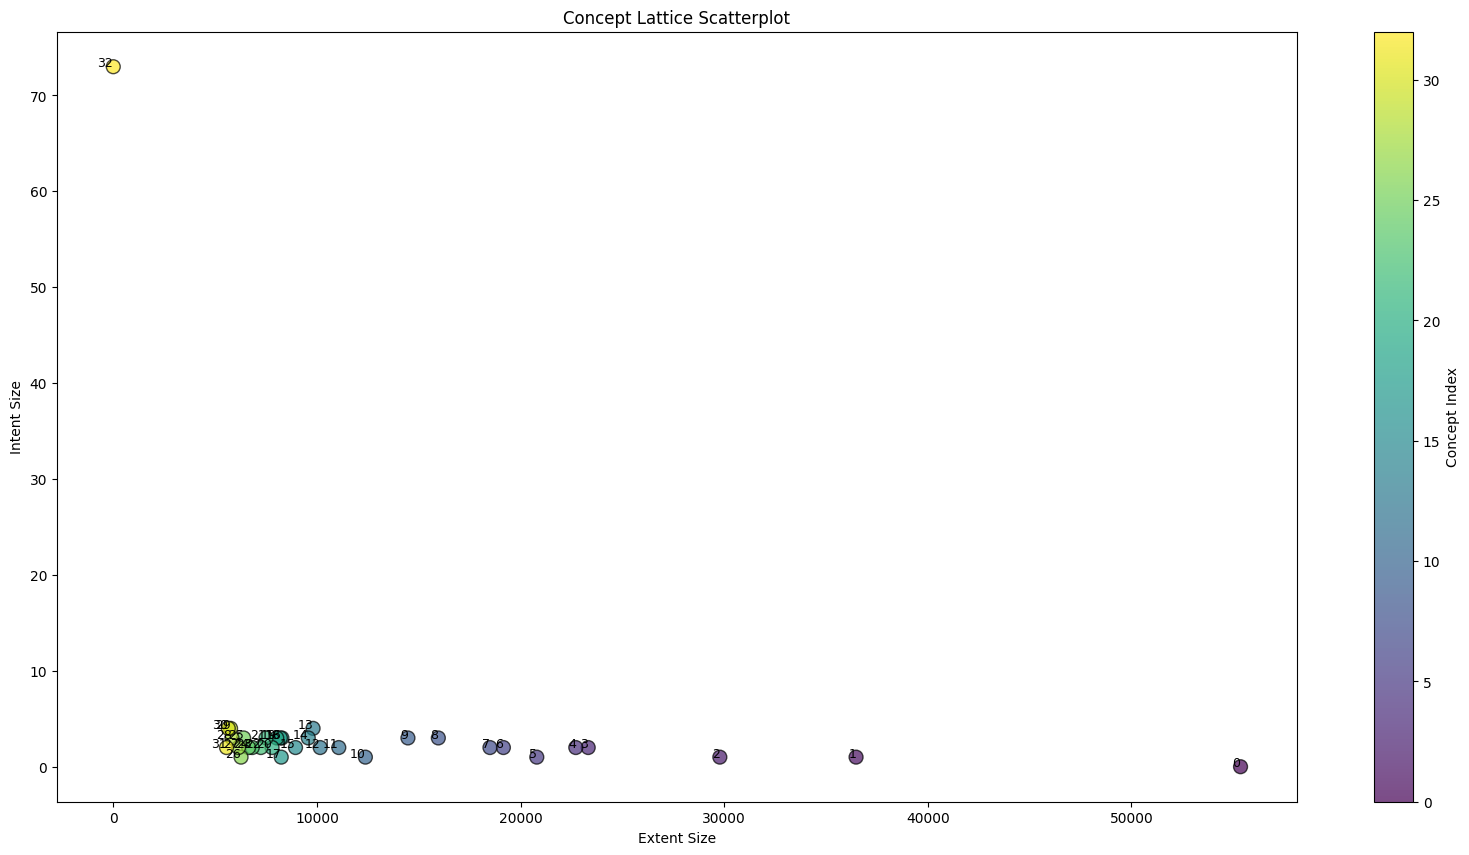

In [39]:
# Plotting the concept lattice as a scatterplot
import matplotlib.pyplot as plt

# Extract concepts and assign coordinates (for simplicity, we'll use their index as coordinates)
concepts = [(i, len(concept.extent), len(concept.intent)) for i, concept in enumerate(L)]

# Separate the coordinates for plotting
indices, x_coords, y_coords = zip(*concepts)

# Create scatter plot
fig, ax = plt.subplots(figsize=(20, 10))
scatter = ax.scatter(x_coords, y_coords, c=indices, cmap='viridis', s=100, edgecolors='k', alpha=0.7)
ax.set_xlabel('Extent Size')
ax.set_ylabel('Intent Size')
ax.set_title('Concept Lattice Scatterplot')

# Annotate points with their index
for i, (x, y) in enumerate(zip(x_coords, y_coords)):
    ax.text(x, y, str(i), fontsize=9, ha='right')

plt.colorbar(scatter, label='Concept Index')
plt.savefig('../results/tate_artwork_subjects_scatterplot_legend.png')
plt.show()

In [4]:
# Extract concepts and their extents and intents
concepts = [(concept.extent, concept.intent) for concept in L]
# Flatten the extent list and assign each object an x-coordinate
objects = sorted(set(obj for extent, _ in concepts for obj in extent))
object_to_x = {obj: i for i, obj in enumerate(objects)}

### Concept Index vs. Intent Size

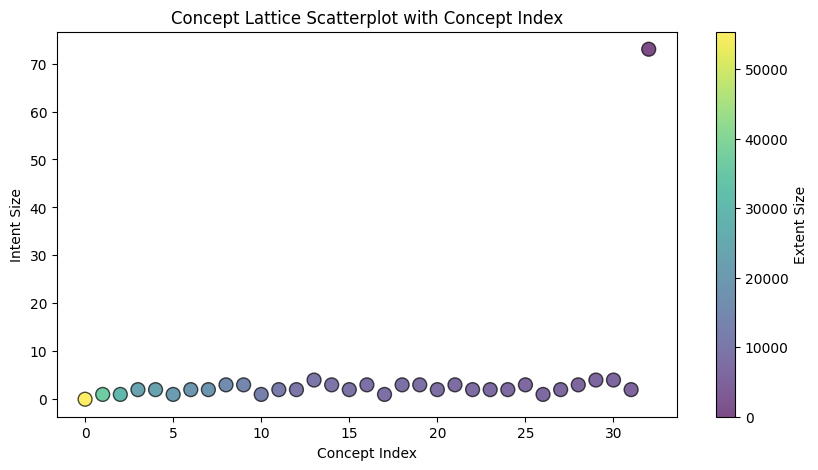

In [46]:
# Extract concepts and assign coordinates based on their index
concept_indices = list(range(len(L)))
intent_sizes = [len(concept.intent) for concept in L]
extent_sizes = [len(concept.extent) for concept in L]

# Create scatter plot
fig, ax = plt.subplots(figsize=(10, 5))
scatter = ax.scatter(concept_indices, intent_sizes, c=extent_sizes, cmap='viridis', s=100, edgecolors='k', alpha=0.7)
ax.set_xlabel('Concept Index')
ax.set_ylabel('Intent Size')
ax.set_title('Concept Lattice Scatterplot with Concept Index')

plt.colorbar(scatter, label='Extent Size')
plt.show()

### Concept Index vs. Extent Size

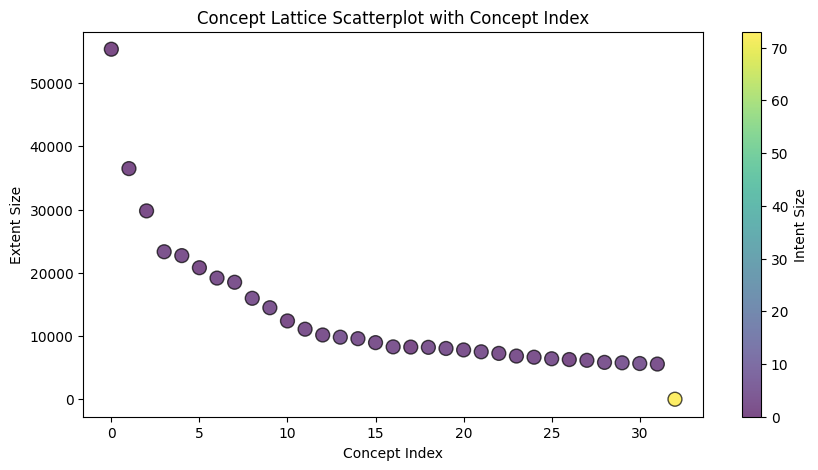

In [47]:
# Extract concepts and assign coordinates based on their index
concept_indices = list(range(len(L)))
extent_sizes = [len(concept.extent) for concept in L]
intent_sizes = [len(concept.intent) for concept in L]

# Create scatter plot
fig, ax = plt.subplots(figsize=(10, 5))
scatter = ax.scatter(concept_indices, extent_sizes, c=intent_sizes, cmap='viridis', s=100, edgecolors='k', alpha=0.7)
ax.set_xlabel('Concept Index')
ax.set_ylabel('Extent Size')
ax.set_title('Concept Lattice Scatterplot with Concept Index')

plt.colorbar(scatter, label='Intent Size')
plt.show()

### Concept Extent Size vs. Intent Size

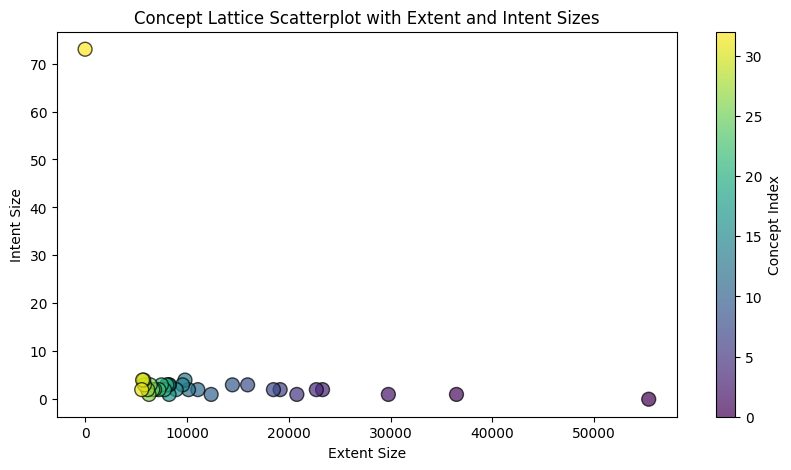

In [12]:
# Extract concepts and assign coordinates based on their extent and intent sizes
extent_sizes = [len(concept.extent) for concept in L]
intent_sizes = [len(concept.intent) for concept in L]

# Create scatter plot
fig, ax = plt.subplots(figsize=(10, 5))
scatter = ax.scatter(extent_sizes, intent_sizes, c=concept_indices, cmap='viridis', s=100, edgecolors='k', alpha=0.7)
ax.set_xlabel('Extent Size')
ax.set_ylabel('Intent Size')
ax.set_title('Concept Lattice Scatterplot with Extent and Intent Sizes')

plt.colorbar(scatter, label='Concept Index')
plt.show()

### Barchart Extent-X and Intent-Y

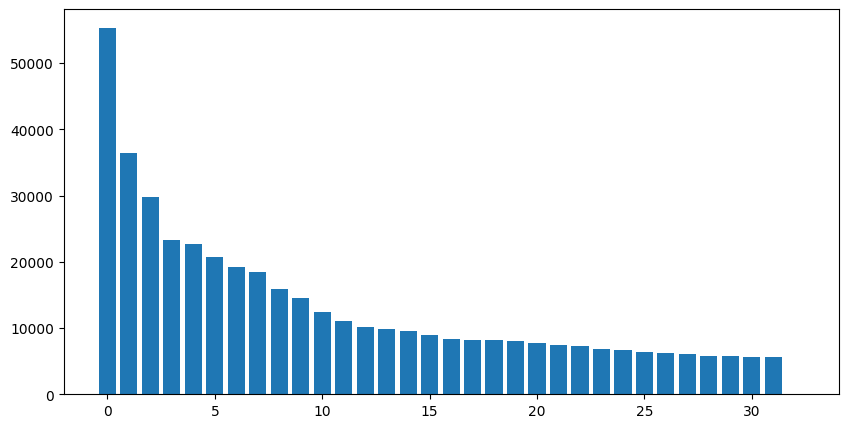

In [57]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x=indices, height=x_coords, width=0.8)
plt.show()

## Saliency Mapping

In [12]:
# Boilerplate imports.
import tensorflow as tf
import numpy as np
import PIL.Image
from matplotlib import pylab as P

# From our repository.
import saliency.core as saliency

%matplotlib inline

In [14]:
# Boilerplate methods.
def ShowImage(im, title='', ax=None):
  if ax is None:
    P.figure()
  P.axis('off')
  P.imshow(im)
  P.title(title)

def ShowGrayscaleImage(im, title='', ax=None):
  if ax is None:
    P.figure()
  P.axis('off')

  P.imshow(im, cmap=P.cm.gray, vmin=0, vmax=1)
  P.title(title)

def ShowHeatMap(im, title, ax=None):
  if ax is None:
    P.figure()
  P.axis('off')
  P.imshow(im, cmap='inferno')
  P.title(title)

def LoadImage(file_path):
  im = PIL.Image.open(file_path).convert('RGB') # add an if block to check if the image is RGB or RGBA because in case it needs conversion
  im = im.resize((224,224))
  im = np.asarray(im)
  return im

def PreprocessImage(im):
  im = tf.keras.applications.vgg16.preprocess_input(im)
  return im

In [15]:
m = tf.keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)
conv_layer = m.get_layer('block5_conv3')
model = tf.keras.models.Model(inputs=m.input, outputs=[conv_layer.output, m.output])

class_idx_str = 'class_idx_str'
def call_model_function(images, call_model_args=None, expected_keys=None):
    target_class_idx =  call_model_args[class_idx_str]
    images = tf.convert_to_tensor(images)
    with tf.GradientTape() as tape:
        if expected_keys==[saliency.base.INPUT_OUTPUT_GRADIENTS]:
            tape.watch(images)
            _, output_layer = model(images)
            output_layer = output_layer[:,target_class_idx]
            gradients = np.array(tape.gradient(output_layer, images))
            return {saliency.base.INPUT_OUTPUT_GRADIENTS: gradients}
        else:
            conv_layer, output_layer = model(images)
            gradients = np.array(tape.gradient(output_layer, conv_layer))
            return {saliency.base.CONVOLUTION_LAYER_VALUES: conv_layer,
                    saliency.base.CONVOLUTION_OUTPUT_GRADIENTS: gradients}

Prediction class: 549


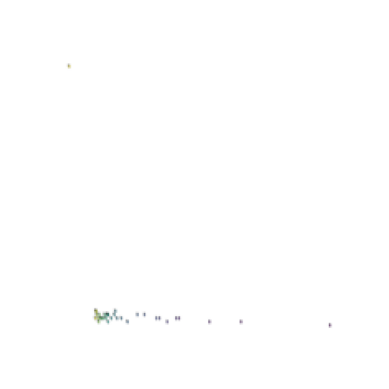

In [18]:
# Load the image
im_orig = LoadImage('../results/tate_artwork_subjects_scatterplot.png')
im = PreprocessImage(im_orig)

# Show the image
ShowImage(im_orig)

_, predictions = model(np.array([im]))
prediction_class = np.argmax(predictions[0])
call_model_args = {class_idx_str: prediction_class}

print("Prediction class: " + str(prediction_class))

## Vanilla Gradient & SmoothGrad

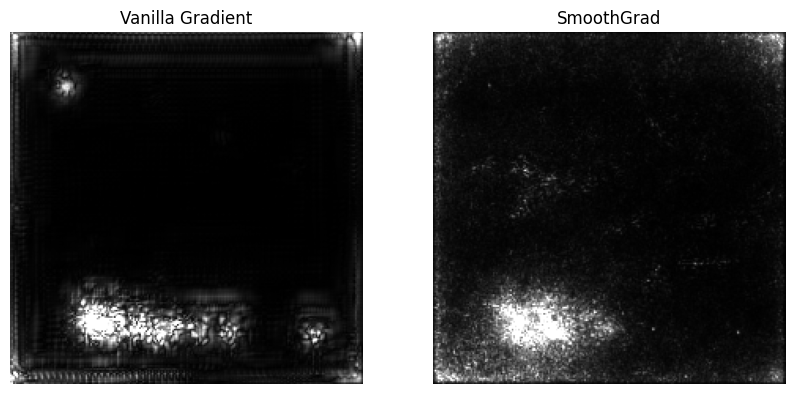

In [21]:
# Construct the saliency object. This alone doesn't do anthing.
gradient_saliency = saliency.GradientSaliency()

# Compute the vanilla mask and the smoothed mask.
vanilla_mask_3d = gradient_saliency.GetMask(im, call_model_function, call_model_args)
smoothgrad_mask_3d = gradient_saliency.GetSmoothedMask(im, call_model_function, call_model_args)

# Call the visualization methods to convert the 3D tensors to 2D grayscale.
vanilla_mask_grayscale = saliency.VisualizeImageGrayscale(vanilla_mask_3d)
smoothgrad_mask_grayscale = saliency.VisualizeImageGrayscale(smoothgrad_mask_3d)

# Set up matplot lib figures.
ROWS = 1
COLS = 2
UPSCALE_FACTOR = 10
P.figure(figsize=(ROWS * UPSCALE_FACTOR, COLS * UPSCALE_FACTOR))

# Render the saliency masks.
ShowGrayscaleImage(vanilla_mask_grayscale, title='Vanilla Gradient', ax=P.subplot(ROWS, COLS, 1))
ShowGrayscaleImage(smoothgrad_mask_grayscale, title='SmoothGrad', ax=P.subplot(ROWS, COLS, 2))
# Save the figure
P.savefig('../results/scatterplot/saliency_masks_grad.png', bbox_inches='tight', pad_inches=0)

## Integrated Gradients & SmoothGrad

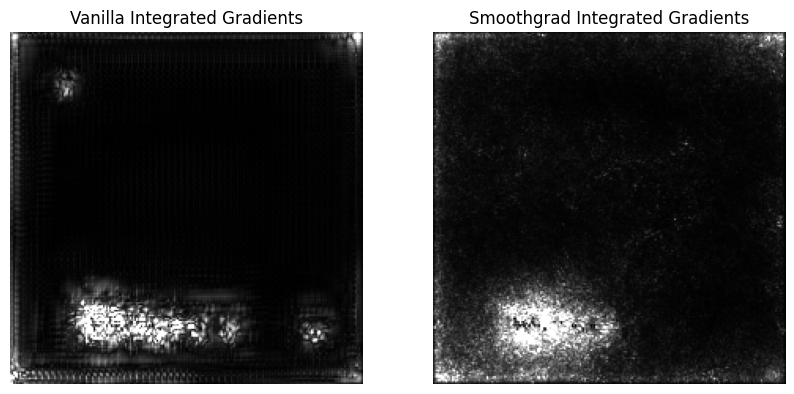

In [22]:
# Construct the saliency object. This alone doesn't do anthing.
integrated_gradients = saliency.IntegratedGradients()

# Baseline is a black image.
baseline = np.zeros(im.shape)

# Compute the vanilla mask and the smoothed mask.
vanilla_integrated_gradients_mask_3d = integrated_gradients.GetMask(
  im, call_model_function, call_model_args, x_steps=25, x_baseline=baseline, batch_size=20)
# Smoothed mask for integrated gradients will take a while since we are doing nsamples * nsamples computations.
smoothgrad_integrated_gradients_mask_3d = integrated_gradients.GetSmoothedMask(
  im, call_model_function, call_model_args, x_steps=25, x_baseline=baseline, batch_size=20)

# Call the visualization methods to convert the 3D tensors to 2D grayscale.
vanilla_mask_grayscale = saliency.VisualizeImageGrayscale(vanilla_integrated_gradients_mask_3d)
smoothgrad_mask_grayscale = saliency.VisualizeImageGrayscale(smoothgrad_integrated_gradients_mask_3d)

# Set up matplot lib figures.
ROWS = 1
COLS = 2
UPSCALE_FACTOR = 10
P.figure(figsize=(ROWS * UPSCALE_FACTOR, COLS * UPSCALE_FACTOR))

# Render the saliency masks.
ShowGrayscaleImage(vanilla_mask_grayscale, title='Vanilla Integrated Gradients', ax=P.subplot(ROWS, COLS, 1))
ShowGrayscaleImage(smoothgrad_mask_grayscale, title='Smoothgrad Integrated Gradients', ax=P.subplot(ROWS, COLS, 2))
P.savefig('../results/scatterplot/saliency_masks_grad_integrated.png', bbox_inches='tight', pad_inches=0)

## XRAI Full and Fast

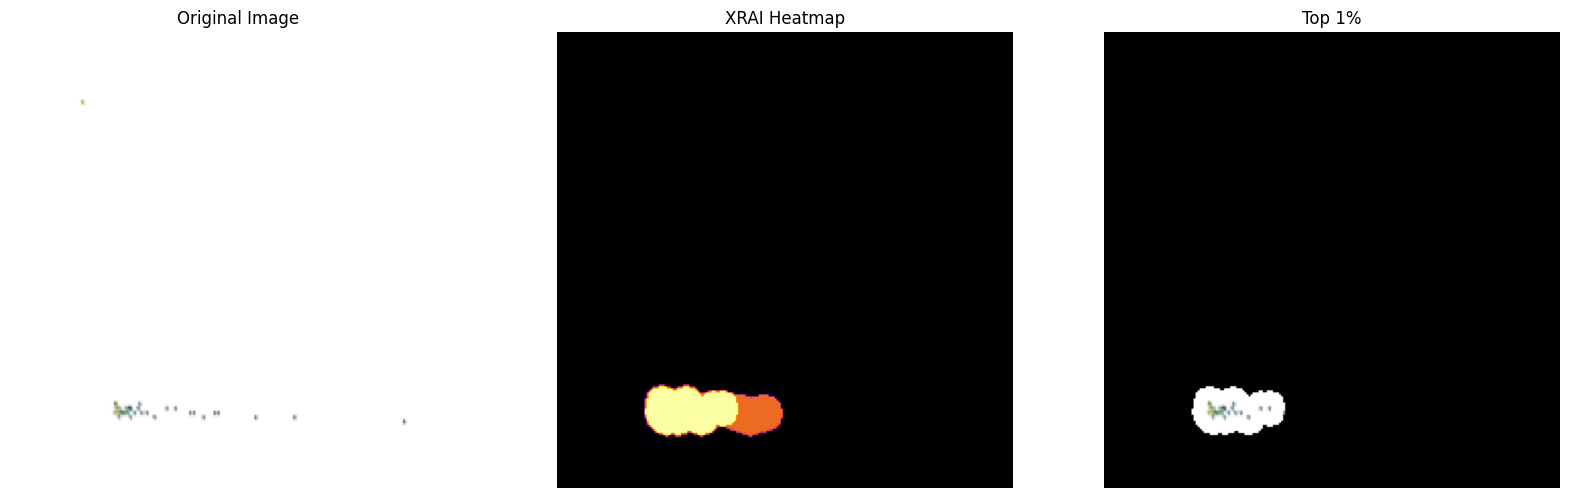

In [24]:
# Construct the saliency object.
xrai_object = saliency.XRAI()

# Compute XRAI attributions with default parameters
xrai_attributions = xrai_object.GetMask(im, call_model_function, call_model_args, batch_size=20)

# Set up matplot lib figures.
ROWS = 1
COLS = 3
UPSCALE_FACTOR = 20
P.figure(figsize=(ROWS * UPSCALE_FACTOR, COLS * UPSCALE_FACTOR))

# Show original image
ShowImage(im_orig, title='Original Image', ax=P.subplot(ROWS, COLS, 1))

# Show XRAI heatmap attributions
ShowHeatMap(xrai_attributions, title='XRAI Heatmap', ax=P.subplot(ROWS, COLS, 2))

# Show most salient 30% of the image
mask = xrai_attributions >= np.percentile(xrai_attributions, 99)
im_mask = np.array(im_orig)
im_mask[~mask] = 0
ShowImage(im_mask, title='Top 1%', ax=P.subplot(ROWS, COLS, 3))
P.savefig('../results/scatterplot/xray_01.png', bbox_inches='tight', pad_inches=0)